In [2]:
# Import libraries
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt


In [3]:
# Select stock
stock_symbol = "AAPL"

# Download historical data
data = yf.download(stock_symbol, start="2020-01-01", end="2024-01-01")

# Show first 5 rows
data.head()


/tmp/ipython-input-1344881229.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2020-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468254,72.528574,71.223252,71.476592,135480400
2020-01-03,71.763725,72.523754,71.539337,71.696167,146322800
2020-01-06,72.335571,72.374177,70.634554,70.885487,118387200
2020-01-07,71.995369,72.600975,71.775804,72.345220,108872000
2020-01-08,73.153473,73.455072,71.698559,71.698559,132079200


In [4]:
# Check columns
data.columns


MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [5]:
# Features
X = data[['Open', 'High', 'Low', 'Volume']]

# Target (Next day Close)
y = data['Close'].shift(-1)

# Last row remove (NaN ki wajah se)
X = X[:-1]
y = y[:-1]


In [6]:
# 80% training, 20% testing
split_ratio = int(len(X) * 0.8)

X_train = X[:split_ratio]
X_test = X[split_ratio:]

y_train = y[:split_ratio]
y_test = y[split_ratio:]


In [7]:
# Create model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Predict closing prices
y_pred = model.predict(X_test)


In [9]:
# Errors
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 1.655769108508215
Root Mean Squared Error: 2.226029787241773


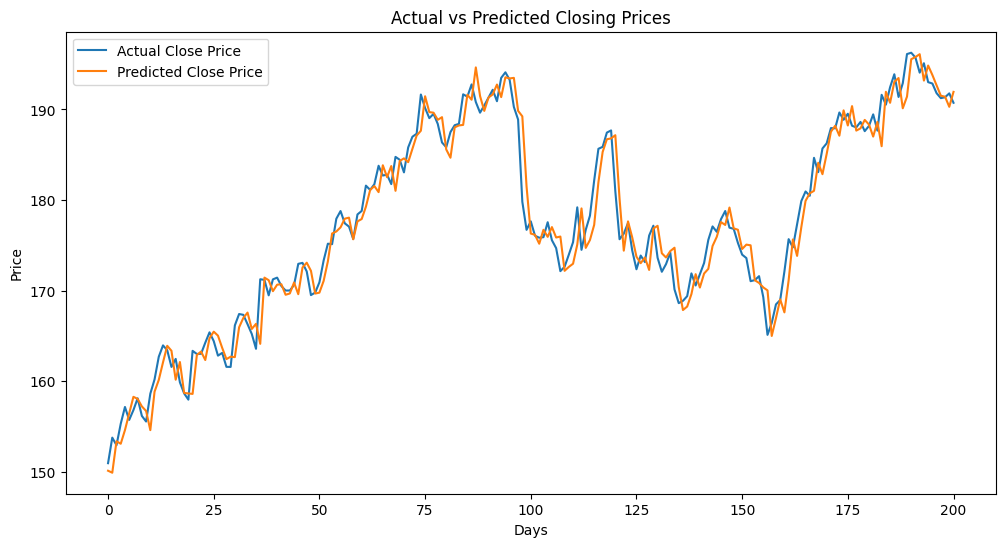

In [10]:
plt.figure(figsize=(12,6))

plt.plot(y_test.values, label="Actual Close Price")
plt.plot(y_pred, label="Predicted Close Price")

plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.show()


In [11]:
# Latest day data
latest_data = X.iloc[-1].values.reshape(1, -1)

# Predict next day close
next_day_price = model.predict(latest_data)

print("Predicted Next Day Closing Price:", next_day_price[0])


Predicted Next Day Closing Price: [191.93414113]
